In [3]:
import os 

import numpy as np 
import pandas as pd

from deepcell.graph_utils import get_max_cells

from deepcell.tmp_funcs import load_mibi_data, load_celltypes

In [12]:
%%time

# data_path = 'D:/GNN/data/TNBC'
data_path = '../data/TNBC/'

mibi_data_path = os.path.join(data_path, 'TNBCShareData')
mibi_label_path = os.path.join(data_path, 'TNBC_labels/label_images.npy')
mibi_celltype_path = os.path.join(data_path, 'TNBCcellTypes')
TNBCpanelInfo_path = os.path.join(data_path,'TNBCpanelInfo.csv')

# print(mibi_data_path)

POINT_LIST = [2, 5, 8, 9, 21, 22, 24, 26, 34, 37, 38, 41]

mibi_data = load_mibi_data(mibi_data_path, point_list=POINT_LIST)
mibi_labels = np.load(mibi_label_path)
mibi_celltypes = load_celltypes(mibi_celltype_path, point_list=POINT_LIST)


# Shrink raw data and labelsa to line up with cell type image
tmp_mibi_data = mibi_data[:,30:-30, 30:-30, :]
mibi_labels = mibi_labels[:,30:-30, 30:-30, :]
mibi_celltypes = mibi_celltypes[:,30:-30, 30:-30, :]

CPU times: user 33.5 s, sys: 3.38 s, total: 36.9 s
Wall time: 36.9 s


In [13]:
mibi_labels.shape

(12, 1988, 1988, 1)

In [14]:
label_image = np.squeeze(mibi_labels)
label_image.shape

(12, 1988, 1988)

In [15]:
max_cells = get_max_cells(label_image)
max_cells

3953

In [16]:
adjacency_matrix = np.zeros((label_image.shape[0], max_cells, max_cells))
centroid_matrix = np.zeros((label_image.shape[0], max_cells, 2))
label_matrix = np.zeros((label_image.shape[0], max_cells))

In [22]:
from skimage.measure import regionprops_table

In [23]:
for batch in range(label_image.shape[0]):
    label_image_batch = label_image[batch]
    
    props = regionprops_table(label_image_batch, properties=['centroid', 'label'])
    
    break

In [26]:
props['centroid-0'].shape

(2343,)

In [28]:
np.stack([props['centroid-0'], props['centroid-1']], axis=-1).shape

(2343, 2)

In [30]:
props['label'].shape

(2343,)

In [31]:
np.stack([props['centroid-0'], props['centroid-1']], axis=-1)

array([[   5, 1038],
       [   2, 1772],
       [   0, 1369],
       ...,
       [1984,  693],
       [1987, 1057],
       [1984,  286]])

In [32]:
from scipy.spatial.distance import cdist

In [ ]:
cdist()

In [1]:
import numpy as np
import skimage as sk

In [2]:
test = sk.data.binary_blobs(128, n_dim=2)

In [3]:
np.unique(sk.measure.label(test))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
def _get_dummy_mibi_data(num_batches=3, img_dim=128):
    """dockersting holder - generate fake mibi data """
    # generate feature data
    
    multiplexed_img = []
    for _ in range(num_batches):
        bias = np.random.rand(img_dim, img_dim, 1)*64
        variance = np.random.rand(img_dim, img_dim, 1) * (255-64)
        imarray = np.random.rand(img_dim, img_dim, 6) * variance + bias
        multiplexed_img.append(imarray)
    multiplexed_img = np.array(multiplexed_img)


    # generate label data
    labels = []
    while len(labels) < num_batches:
        _x = sk.data.binary_blobs(length=img_dim, n_dim=2)
        _y = sk.measure.label(_x)
        if len(np.unique(_y)) > 3:
            labels.append(_y)

    labels = np.stack(labels, axis=0)
    labels = np.expand_dims(labels, axis=-1)

    return multiplexed_img.astype('float32'), labels.astype('int32')

In [13]:
x, y = _get_dummy_mibi_data()

In [14]:
x.shape

(3, 128, 128, 6)

In [15]:
y.shape

(3, 128, 128, 1)

In [4]:
max([3,5,20])

20

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)

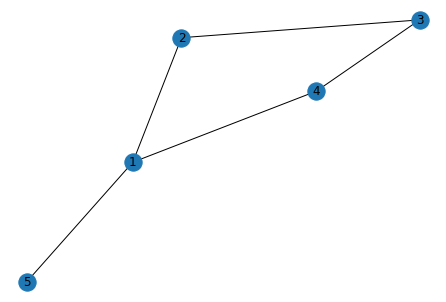

In [14]:
nx.draw(g, with_labels=True)

In [20]:
g.degree()

DegreeView({1: 3, 2: 2, 3: 2, 4: 2, 5: 1})

In [18]:
adj = nx.linalg.adj_matrix(g)

In [19]:
adj.toarray()

array([[0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [21]:
laplacian = nx.linalg.laplacian_matrix(g)

In [25]:
degree = laplacian + adj

In [27]:
degree.toarray()

array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]])

In [44]:


 # or something, IDK what the answer should be

In [30]:
from deepcell.graph_utils import get_max_cells

In [39]:
get_max_cells(x)

4

In [38]:
x.shape

(1, 8, 8, 1)

In [42]:
np.squeeze(x[0,...])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]])